In [72]:
import pandas as pd
import math

In [73]:
df = pd.read_csv("../compounds_data/cleansed_and_with_freq.csv", na_values="NaN")
df = df.rename(columns={"freq_class": "final_freq_class"})

In [74]:
df_de_web = pd.read_csv('../frequency_data/wortschatz-leipzig/deu-de_web_2021_1M-words.txt', sep="\t", header=None, names=['word', 'freq'])
df_de_web

,word,freq
101,und,506683
102,der,443830
103,die,422247
104,in,243094
105,für,161903
...,...,...
694898,﻿Aus,1
694899,﻿Beim,1
694900,﻿Digitalisierung,1
694901,﻿Überdosierung,1


In [75]:
# Calculate the frequency class for each word: ⌊log2(max_f/f(grundform))+0,5⌋
max_f = df_de_web['freq'].max()
df_de_web['freq_class'] = df_de_web['freq'].apply(lambda x: int(math.floor(math.log2(max_f/x)+0.5)))
df_de_web

,word,freq,freq_class
101,und,506683,0
102,der,443830,0
103,die,422247,0
104,in,243094,1
105,für,161903,2
...,...,...,...
694898,﻿Aus,1,19
694899,﻿Beim,1,19
694900,﻿Digitalisierung,1,19
694901,﻿Überdosierung,1,19


In [76]:
# Merge the frequency class into the main compound data
df_merged = df.merge(df_de_web, how='left', left_on='compound', right_on='word')
df_merged = df_merged.drop(columns=['word', 'freq'])
df_merged

,compound,modifier,head,final_freq_class,freq_class
0,Aalbestand,Aal,Bestand,45.0,NaN
1,Aalfang,Aal,Fang,43.0,NaN
2,Aalfisch,Aal,Fisch,NaN,NaN
3,Aalmutter,Aal,Mutter,NaN,NaN
4,Aalquappe,Aal,Quappe,NaN,NaN
...,...,...,...,...,...
122960,Zimmermann,zimmern,Mann,26.0,12.0
122961,Zimmermeister,Zimmer,Meister,37.0,19.0
122962,Zimmermeister,zimmern,Meister,37.0,19.0
122963,Zulaufstrecke,Zulauf,Strecke,NaN,NaN


In [77]:
# Show statistics on the frequency class
print(df_merged['freq_class'].value_counts(dropna=False).sort_index())


6.0         1
7.0         1
8.0        19
9.0        37
10.0      104
11.0      254
12.0      692
13.0     1390
14.0     2624
15.0     4686
16.0     6675
17.0    11530
18.0     9149
19.0    19291
NaN     66512
Name: freq_class, dtype: int64


In [78]:
# Add the frequency data from the derewo dataset
df_derewo = pd.read_csv('../frequency_data/derewo-v-ww-bll-250000g-2011-12-31-0.1/data_without_header.txt', sep=" ", header=None, names=['word', 'freq_derewo'], index_col=False)
df_merged = df_merged.merge(df_derewo, how='left', left_on='compound', right_on='word')
df_merged = df_merged.drop(columns=['word'], axis=1)

C:\Users\Martin\AppData\Local\Temp\ipykernel_21284\3442221906.py:2: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  df_derewo = pd.read_csv('../frequency_data/derewo-v-ww-bll-250000g-2011-12-31-0.1/data_without_header.txt', sep=" ", header=None, names=['word', 'freq_derewo'], index_col=False)


In [79]:
# For each of the frequencies, show 5 random compounds with that frequency
freqs = df_merged['freq_class'].unique()
freqs.sort()
for freq in freqs:
    print(f"Frequency:{freq}, Count:{df_merged[df_merged['freq_class'] == freq].shape[0]}")
    count = df_merged[df_merged['freq_class'] == freq].shape[0]
    sample_size = min(count, 8)
    print(df_merged[df_merged['freq_class'] == freq].sample(n=sample_size, random_state=1))
    print('----------------')

Frequency:6.0, Count:1
         compound modifier    head  final_freq_class  freq_class  freq_derewo
42075  Hochschule     hoch  Schule              17.0         6.0         11.0
----------------
Frequency:7.0, Count:1
        compound modifier  head  final_freq_class  freq_class  freq_derewo
37339  Grundlage    grund  Lage              18.0         7.0         11.0
----------------
Frequency:8.0, Count:19
           compound modifier   head  final_freq_class  freq_class  freq_derewo
3190         Anzahl       an   Zahl              20.0         8.0         12.0
111697    Zeitpunkt     Zeit  Punkt              19.0         8.0         11.0
29615     Freistaat     frei  Staat              21.0         8.0         13.0
73004     Plattform    platt   Form              21.0         8.0         13.0
2993         Anteil       an   Teil              18.0         8.0         10.0
107500     Webseite      Web  Seite              22.0         8.0         14.0
3429    Arbeitgeber   Arbeit  Geber  

# Revisited
The currenlty used frequency dataset, has a huge emphasis on eg politics, sports, news, etc. (as the data is probably from news articles).

"enthalten belletristische, wissenschaftliche und populärwissenschaftliche Texte, eine große Zahl von Zeitungstexten sowie eine breite Palette weiterer Textarten und werden kontinuierlich weiterentwickelt."
https://www.ids-mannheim.de/digspra/kl/projekte/korpora/

The current difficulty thresholds are 
- Easy: <= 13
- Medium <= 16
- Hard <= 20

6.0          1
7.0          2
8.0         21
9.0         59
10.0       165
11.0       419
12.0      1113
13.0      2503
14.0      5128
15.0      9820
16.0     16499
17.0     28034
18.0     37186
19.0     56479
NaN     122991
Name: freq_de_web, dtype: int64
8.0          2
9.0          7
10.0        38
11.0       103
12.0       300
13.0       803
14.0      1981
15.0      4527
16.0      9425
17.0     17773
18.0     30151
19.0     46562
20.0     65191
21.0     81678
22.0     91545
23.0     95319
24.0     96091
25.0     96124
26.0     96132
27.0     96133
NaN     122991
Name: freq_derewo, dtype: int64


<AxesSubplot: >

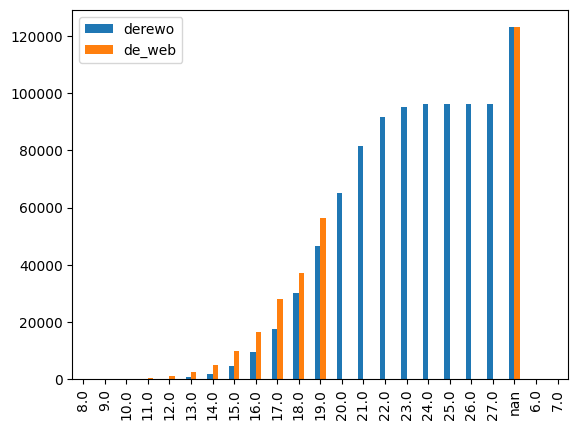

In [80]:
import matplotlib.pyplot as plt

# Rename the freq_class column to freq_de_web
df_merged = df_merged.rename(columns={'freq_class': 'freq_de_web'})

# Compare the two frequency datasets in a single bar chart
freq_count_de_web = df_merged['freq_de_web'].value_counts(dropna=False).sort_index().cumsum()
freq_count_derewo = df_merged['freq_derewo'].value_counts(dropna=False).sort_index().cumsum()

print(freq_count_de_web)
print(freq_count_derewo)

freq_merged = pd.concat([freq_count_derewo, freq_count_de_web], axis=1)
freq_merged.columns = ['derewo', 'de_web']
freq_merged.plot(kind='bar')


Potential new frequency_class bounds for freq_web_de
- Einfach: 11 - 12
- Mittel: 15
- Schwer: 18 - 19

In [81]:
# For de_web, show samples for each difficulty
steps = [12, 15, 18]
for step in steps:
    mask = df_merged['freq_de_web'] <= step
    print(f"Frequency:{step}, Count:{df_merged[mask].shape[0]}")
    count = df_merged[mask].shape[0]
    sample_size = min(count, 8)
    print(df_merged[mask].sample(n=sample_size, random_state=1))
    print('----------------')

Frequency:12, Count:1113
               compound   modifier     head  final_freq_class  freq_de_web  \
31749   Gebärdensprache    Gebärde  Sprache              27.0         11.0   
100537     Umweltschutz     Umwelt   Schutz              22.0         10.0   
11139   Bildungsangebot    Bildung  Angebot              27.0         12.0   
50021       Klimawandel      Klima   Wandel              22.0          9.0   
114196     Anlaufstelle   anlaufen   Stelle              24.0         10.0   
21534     Entgeltgruppe    Entgelt   Gruppe              32.0         12.0   
83487   Schlüsseldienst  Schlüssel   Dienst              29.0         11.0   
96905          Textform       Text     Form              32.0         12.0   

        freq_derewo  
31749          16.0  
100537         12.0  
11139          15.0  
50021          13.0  
114196         14.0  
21534          20.0  
83487          18.0  
96905          20.0  
----------------
Frequency:15, Count:9820
                 compound      m

In [82]:
# Create the same samples for derewo
steps = [13, 16, 20]
for step in steps:
    mask = df_merged['freq_derewo'] <= step
    print(f"Frequency:{step}, Count:{df_merged[mask].shape[0]}")
    count = df_merged[mask].shape[0]
    sample_size = min(count, 8)
    print(df_merged[mask].sample(n=sample_size, random_state=1))
    print('----------------')

Frequency:13, Count:803
             compound modifier     head  final_freq_class  freq_de_web  \
1471         Albtraum      Alb    Traum              28.0         15.0   
121793     Tanzgruppe   tanzen   Gruppe              29.0         16.0   
91580       Stadtwerk    Stadt     Werk              28.0         16.0   
34579   Gesetzentwurf   Gesetz  Entwurf              24.0         11.0   
80690       Rückstand     rück    Stand              24.0         13.0   
39799     Hauptstraße    haupt   Straße              25.0         13.0   
14179       Bundesamt     Bund      Amt              22.0         10.0   
122216     Tiefgarage    Tiefe   Garage              26.0         13.0   

        freq_derewo  
1471           13.0  
121793         13.0  
91580          12.0  
34579          13.0  
80690          11.0  
39799          12.0  
14179          12.0  
122216         13.0  
----------------
Frequency:16, Count:9425
                compound modifier        head  final_freq_class  freq

16.0         1
17.0         3
18.0        10
19.0        25
20.0        46
21.0        74
22.0       116
23.0       181
24.0       290
25.0       480
26.0       774
27.0      1208
28.0      1913
29.0      2929
30.0      4310
31.0      6125
32.0      8638
33.0     12003
34.0     15909
35.0     20760
36.0     26425
37.0     32534
38.0     38901
39.0     44850
40.0     50484
41.0     56741
42.0     65115
43.0     75884
44.0     87579
45.0     95816
46.0    102722
Name: final_freq_class, dtype: int64

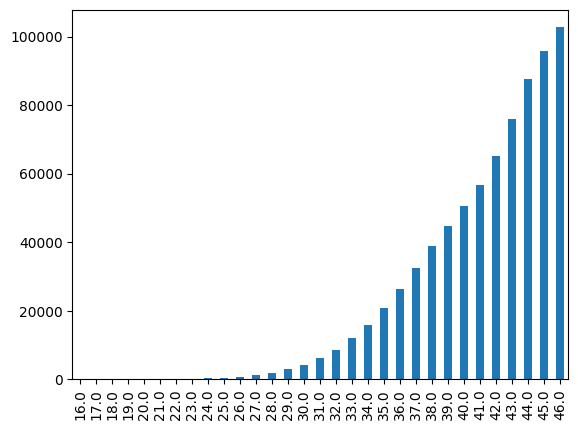

In [83]:
# Create a bar chart with the sum of the two frequencies
freq_count_sum = df['final_freq_class'].value_counts(dropna=True).sort_index().cumsum()
freq_count_sum.plot(kind='bar')

freq_count_sum